In [1]:
import matplotlib.pyplot as plt
%config Completer.use_jedi = False
import tqdm
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
#mpl.rcParams['figure.figsize'] = (6, 4)
import numpy as np
import h5py

%load_ext autoreload
%autoreload 2

# Grids

In [2]:
with h5py.File('./data/gaiaedr3_grid.h5', 'r') as f:
    grid = f['grid'][:]
    extent = f['extent'][:]

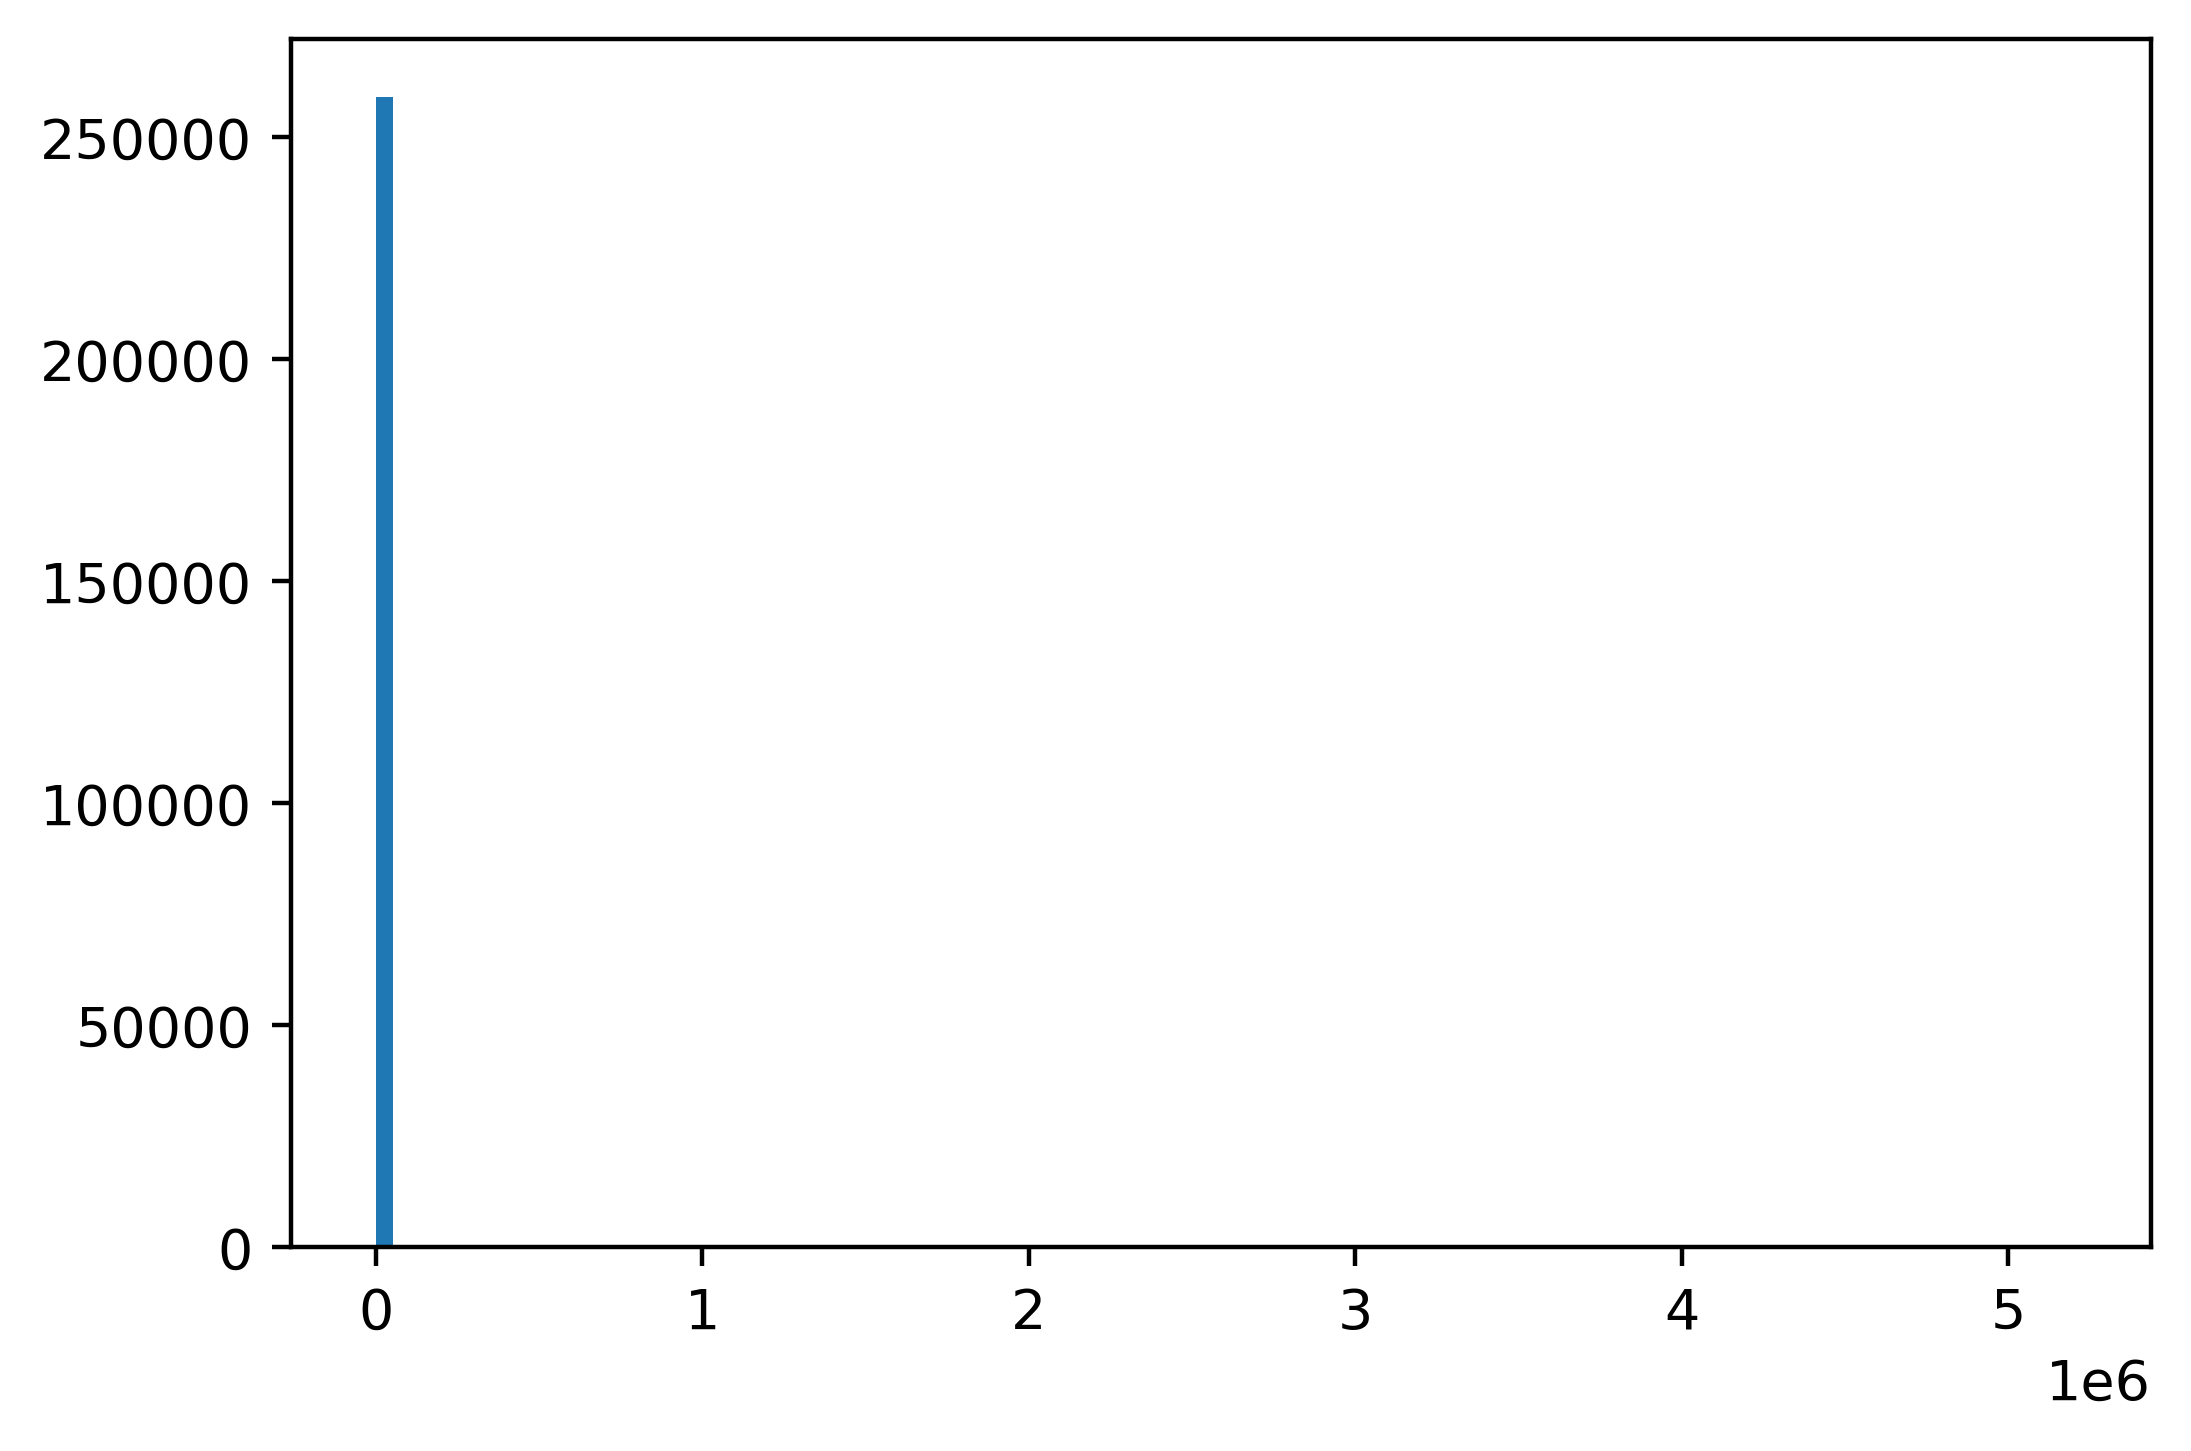

In [5]:
plt.hist(X.flatten(),100);

In [61]:
np.where(grid.sum(axis=(0,2))>0)

(array([ 14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
        183, 184, 185, 186, 187, 188, 189, 190, 191

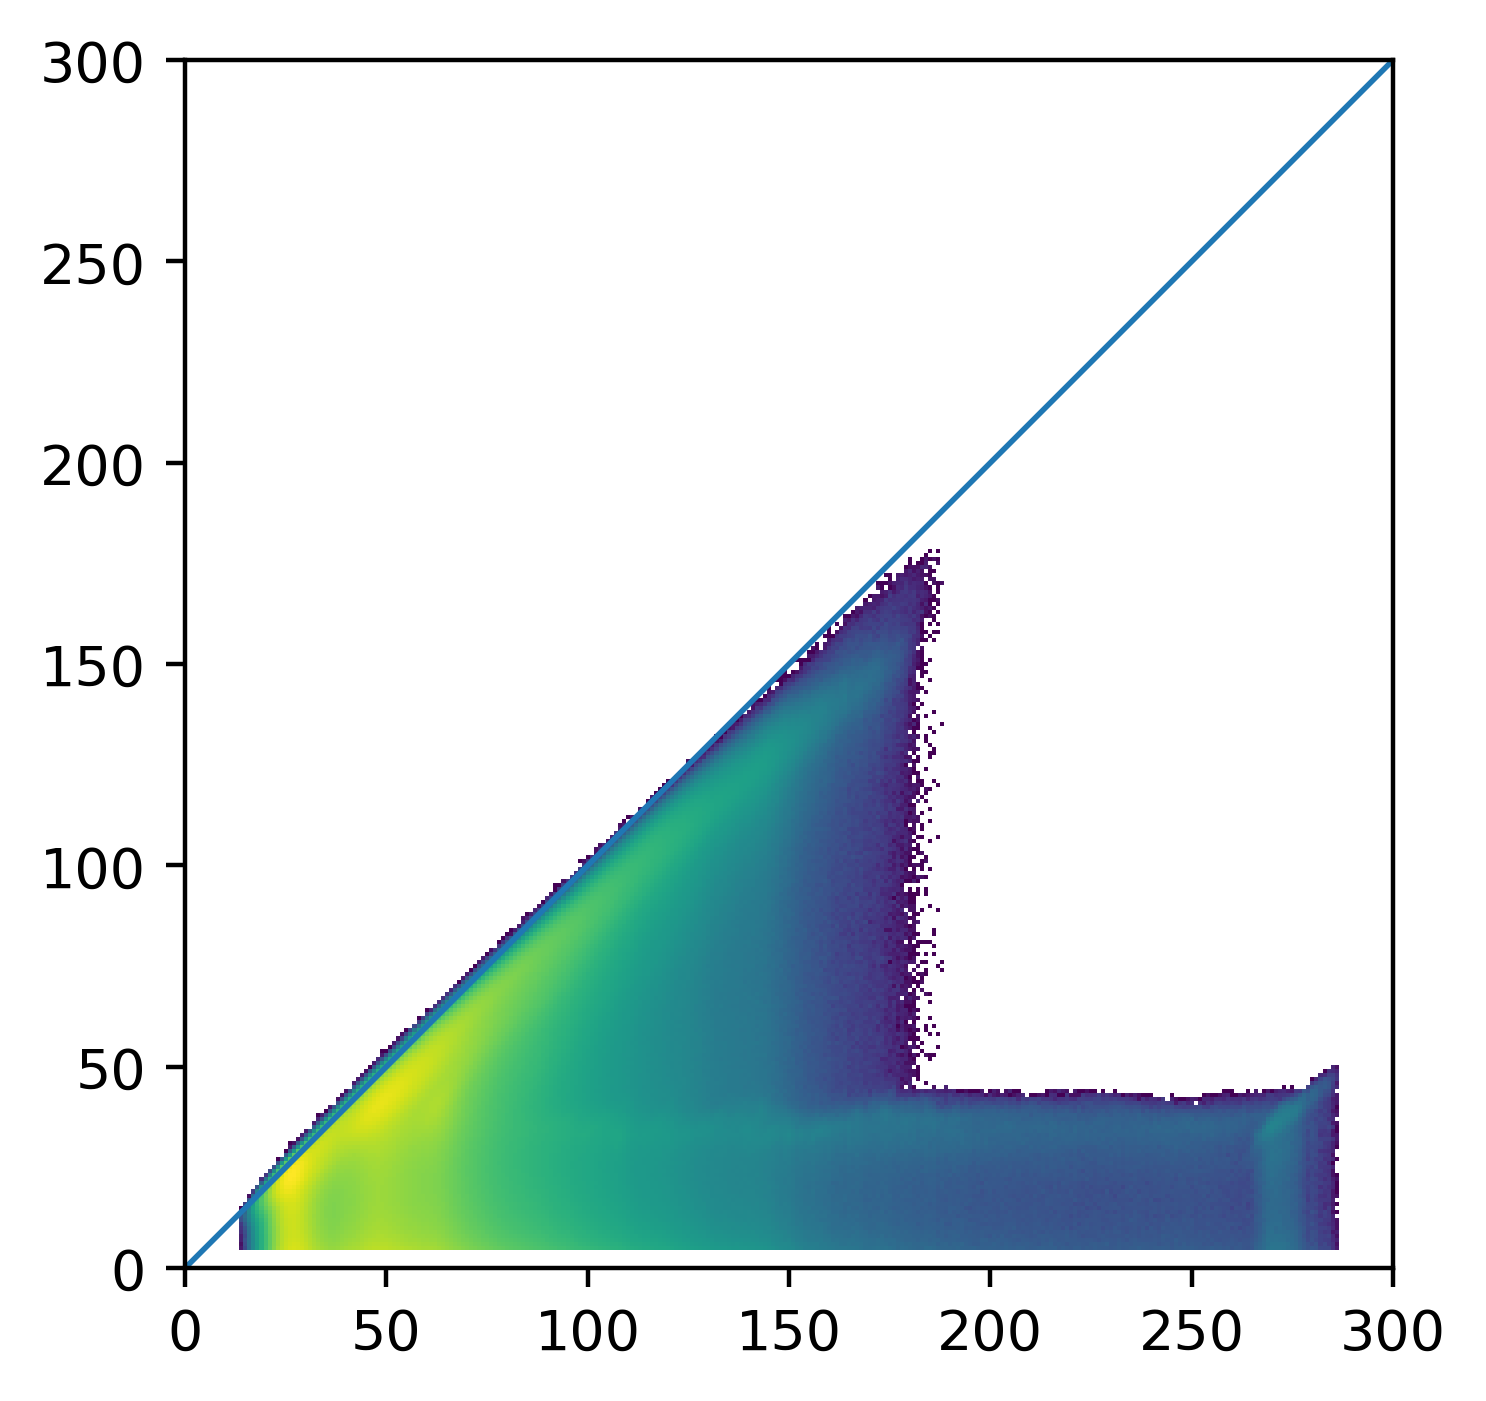

In [12]:
from matplotlib.colors import LogNorm
X = grid.sum(axis=0).astype(float)
X[X<1] = np.nan
plt.imshow(X.T,extent=extent[2:],origin='lower',norm=LogNorm(vmin=1))
plt.xlim([0,300])
plt.ylim([0,300])
plt.plot([0,300],[0,300],lw=1)

In [ ]:
from scipy import stats
n,k = np.meshgrid(np.arange(512),np.arange(512))
g_bins = np.arange(1.7,23.05,0.1)
g = 0.5*(g_bins[1:]+g_bins[:-1])
block = grid[np.where((g>21)&(g<21.1))[0]].sum(axis=0)
N = block.sum()
x = np.linspace(0,1,101)
beta_box = {n:{k:stats.beta(a=1+k,b=1+n-k).pdf(x) for k in range(n+1)} for n in range(80)}
pmf = np.zeros(x.size)
for n in range(80):
    for k in range(n+1):
        pmf += beta_box[n][k]*block[n,k]/N

In [53]:
from scipy import stats
n,k = np.meshgrid(np.arange(512),np.arange(512))
g_bins = np.arange(1.7,23.05,0.1)
g = 0.5*(g_bins[1:]+g_bins[:-1])
block = grid[np.where((g>21)&(g<21.1))[0]].sum(axis=0)
N = block.sum()
x = np.linspace(0,1,101)
beta_box = {n:{k:stats.beta(a=1+k,b=1+n-k).pdf(x) for k in range(n+1)} for n in range(80)}
pmf = np.zeros(x.size)
for n in range(80):
    for k in range(n+1):
        pmf += beta_box[n][k]*block[n,k]/N

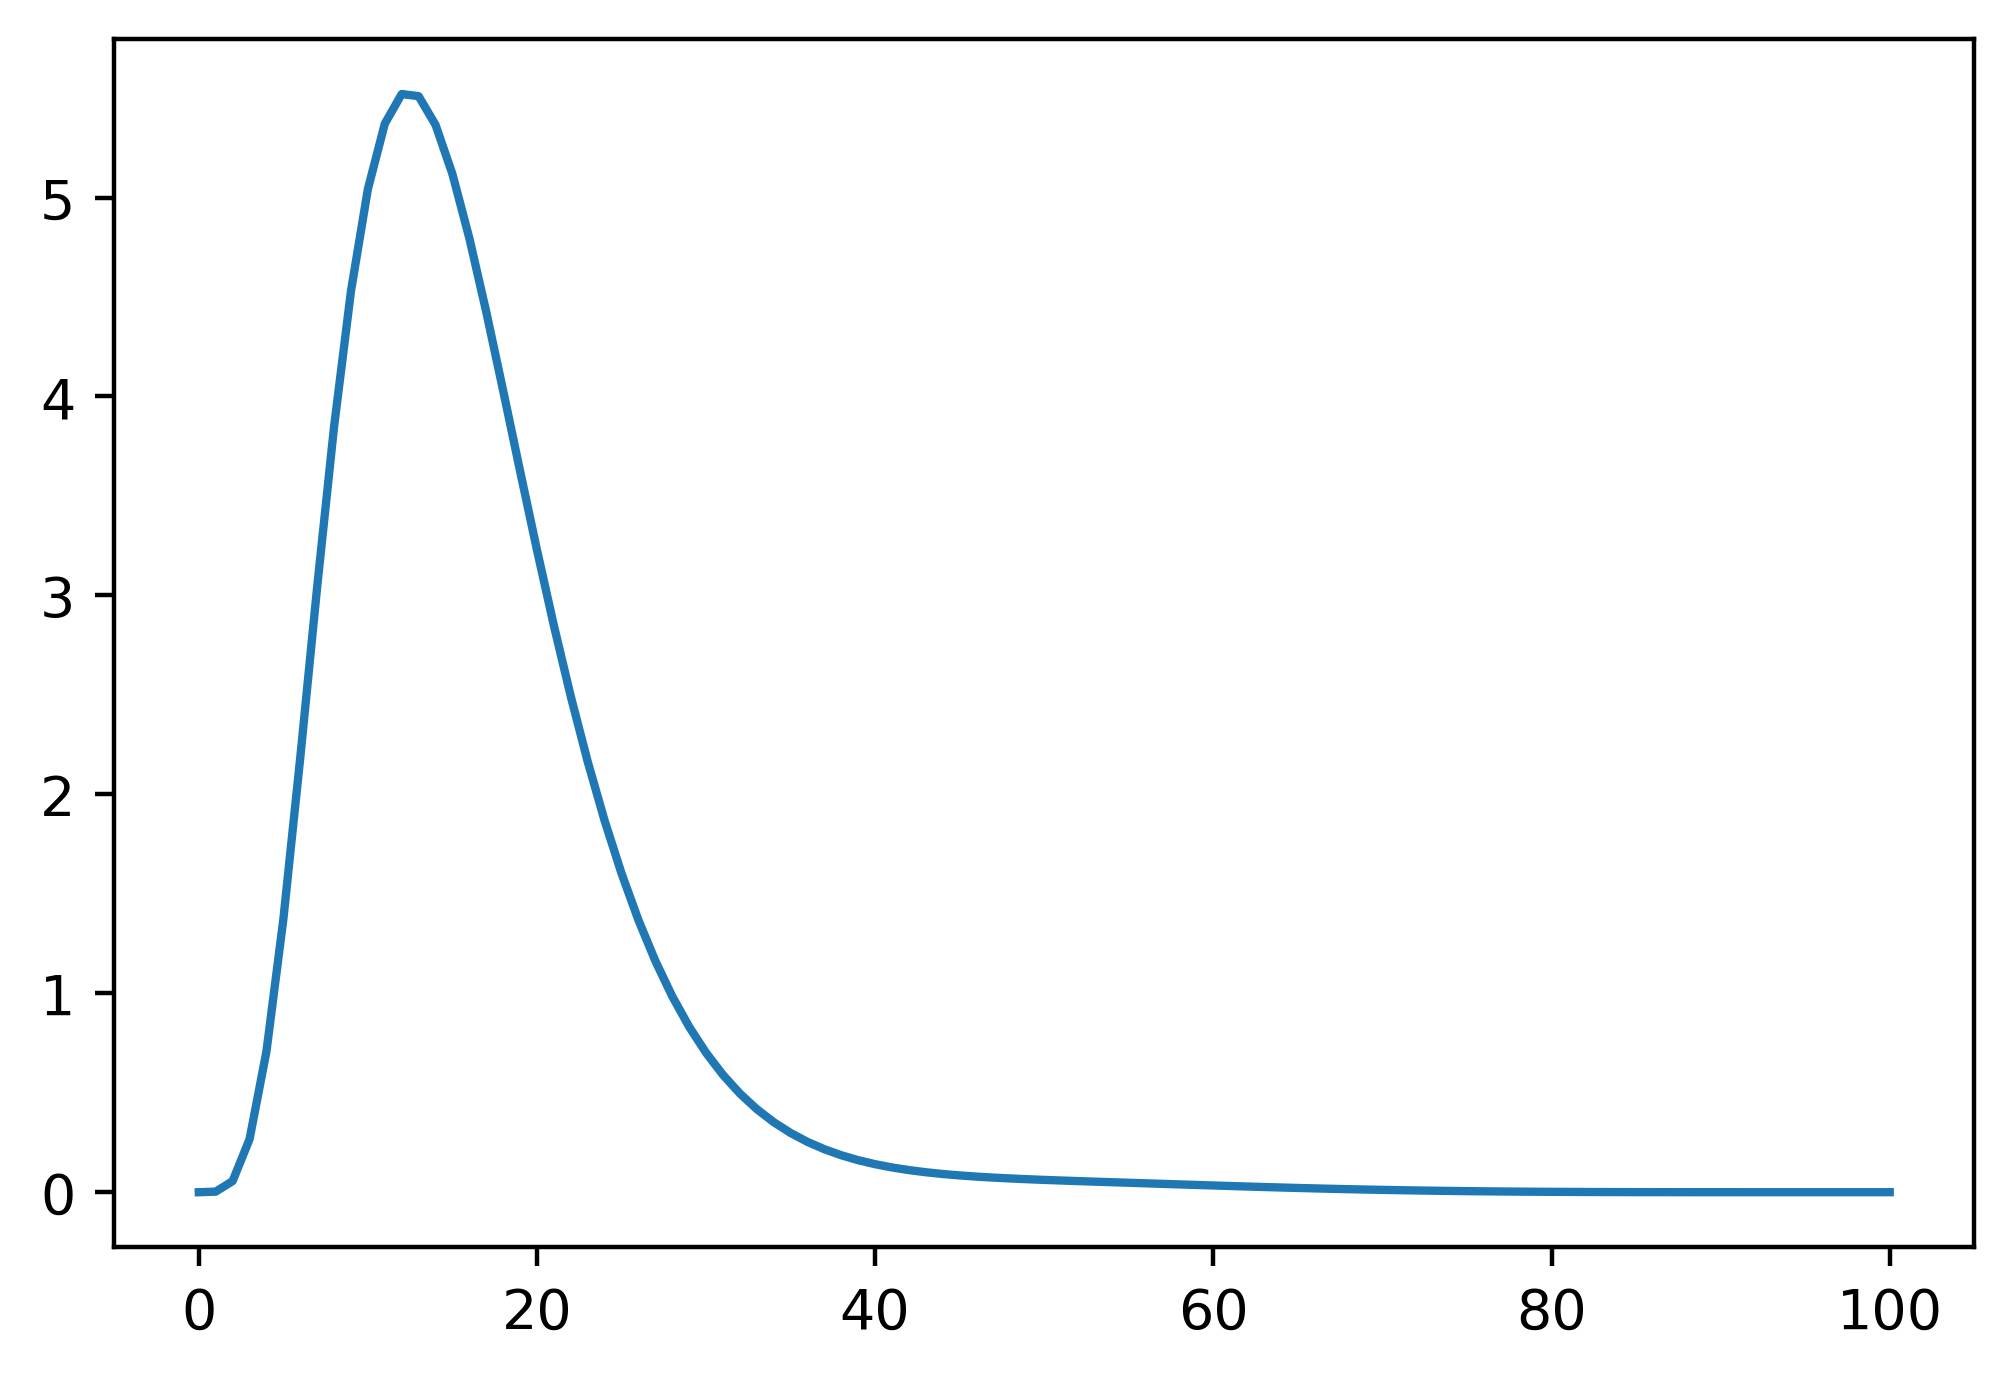

In [54]:
plt.plot(pmf)

In [16]:
g_bin

NameError: name 'g_bin' is not defined